In [3]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles

# RC10:11. Simplifying Boolean Expressions

A while back I built a 4-bit adder on a breadboard and managed to reduce each full adder component to five logic gates. In truth I'm not sure how I managed it, since I didn't know about boolean algebra. From what I can deduce from the long series of deranged-looking and often-abandoned schematics I discovered in my notebook, it took quite a bit of trial and error.

Well, I'm building another adder (and eventually an ALU), and this time I'm determined to derive the logic using boolean algebra. Thanks to some collaboration from a fellow recurser, I've figured it out.

## A Quick 'n Dirty Primer on Binary 

First things first: The number system we normally use is base 10, or decimal, or denary. That means we have 10 digital to choose from: your friends and mine, `0`, `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, and `9`. But we can count to higher than `9`, can't we? When we run out of digits, we carry over the 1 from the ones place to the tens place and keep going.

Same idea with binary, except that it's base-2, which means we have two digits to choose from, `0` and `1`. And *that* means that we have to carry over once we exhause those two digits. So counting from 0 to 10 looks more like this:

```
   0 => 0
   1 => 1
  10 => 2
  11 => 3
 100 => 4
 101 => 5
 110 => 6
 111 => 7
1000 => 8
1001 => 9
1010 => 10
```

In a base-10 number system, each place value represents $10^n$, where $n$ is the place from right to left. Hence the ones place, the tens place, the hundreds place, etc. In base-2, each place value represents instead $2^n$.

## Binary Addition
When it comes to addition, well, binary addition once again follows the same logic and rules used in denary addition, except with fewer available digits.

```
0 + 0 = 0
1 + 0 = 1
0 + 1 = 1
1 + 1 = 10 => carry the one
```

Here's a slightly more complicated example. Let's say we're adding 21 and 19 in decimal. We start with the digits on the right -- the least significant ones since they're the ones place -- and we add them up. If they exceed 9, what do we do? Carry the one! And repeat.

$$
\begin{array}{r@{\hskip 0em}r@{\hskip 0em}r}
 & ^1 & \\
 & 2 & 1 \\
+ & 1 & 9 \\
\hline
 & 4 & 0 \\
\end{array}
$$

In binary it's pretty much the drill, except for the fewer available digits thing. So if we want to add 21 (10101 in binary) and 19 (10011), it would look a little like this:

$$
\begin{array}{r}
& &  ^1  &   & ^1 & ^1 & ^1 \\
    & & & 1 & 0 & 1 & 0 & 1 \\
  + & & & 1 & 0 & 0 & 1 & 1 \\
  \hline
  & & 1 & 0 & 1 & 0 & 0 & 0
\end{array}
$$

## Towards an Adder

This is all well and good, but the question is how to combine logic gates to produces this behavior. What we need is to combine two input bits, `a` and `b`, and somehow spit out both a sum bit `y` and a carry bit `c`.

### The Sum Bit
If we're adding two bits, there are only four possible combinations of digits we can add together -- `0 + 0`, `0 + 1`, `1 + 0`, and `1 + 1`. A truth table makes clear what we would expect from each of these combinations:

<table style="border-collapse: collapse;">
  <tr>
    <th style="padding: 10px; text-align: center; border-right: 0; border-bottom: 2px solid black;">a</th>
    <th style="padding: 10px; text-align: center; border-right: 2px solid black; border-bottom: 2px solid black;">b</th>
    <th style="padding: 10px; text-align: center; border-bottom: 2px solid black;">sum y</th>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
  </tr>
</table>

It seems, then, that the sum bit is the logical combination of `a XOR b`. Or to put it formally:
$$
y_{i} = a_{i} \oplus b_{i}
$$
where *i* is the bit place.

### The Carry Bit
The truth table for the carry bit, alternatively, would look like this:

<table style="border-collapse: collapse;">
  <tr>
    <th style="padding: 10px; text-align: center; border-right: 0; border-bottom: 2px solid black;">a</th>
    <th style="padding: 10px; text-align: center; border-right: 2px solid black; border-bottom: 2px solid black;">b</th>
    <th style="padding: 10px; text-align: center; border-bottom: 2px solid black;">carry bit c</th>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
  </tr>
</table>

In this case, the carry bit is the logical combination of a AND b. Formally:
$$
c_{i+1} = a_{i} \cap b_{i}
$$
where *i* is the bit place. (Note that the carry bit is at place *i + 1* since it will be summed along with the next most significant digits.)

### The Full Adder

This is all well and good, but as we saw in the sample binary addition equation above, we're acutally always dealing with three terms: not only input `a` and input `b`, but also carry bit `c` from the next least significant digit.

The logic table for a full adder, then -- one which takes inputs `a` and `b` *and* a carry bit `c` -- would look like this:

<table style="border-collapse: collapse;">
  <tr>
    <th style="padding: 10px; text-align: center; border-right: 0; border-bottom: 2px solid black;">a<sub>i</sub></th>
    <th style="padding: 10px; text-align: center; border-right: 0; border-bottom: 2px solid black;">b<sub>i</sub></th>
    <th style="padding: 10px; text-align: center; border-right: 2px solid black; border-bottom: 2px solid black;">c<sub>i</sub></th>
    <th style="padding: 10px; text-align: center; border-bottom: 2px solid black;">sum y<sub>i</sub></th>
    <th style="padding: 10px; text-align: center; border-bottom: 2px solid black;">carry c<sub>i+1</sub></th>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
  </tr>
</table>

## Constructing a Boolean Expression for the Sum Bit

The first step in figuring out how to build an adder is to sort out the logic for the sum bit. I'll follow the approach of constructing a logical statement for each `True`, or `1`, output, `OR`ing the results together, and simplifying.

<table style="border-collapse: collapse;">
  <tr>
    <th style="padding: 10px; text-align: center; border-right: 0; border-bottom: 2px solid black;">a<sub>i</sub></th>
    <th style="padding: 10px; text-align: center; border-right: 0; border-bottom: 2px solid black;">b<sub>i</sub></th>
    <th style="padding: 10px; text-align: center; border-right: 2px solid black; border-bottom: 2px solid black;">c<sub>i</sub></th>
    <th style="padding: 10px; text-align: center; border-bottom: 2px solid black;">sum y<sub>i</sub></th>
    <th style="padding: 10px; text-align: center; border-bottom: 2px solid black;">Logic</th>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
    <td></td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: black;">NOT(A) AND NOT(B) AND C</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: black;">NOT(A) AND B AND NOT(C)</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
    <td></td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: black;">A AND NOT(B) AND NOT(C)</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
    <td></td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
    <td></td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: black;">A AND B AND C</td>
  </tr>
</table>

`OR`ing it all together, the full expression is as follows:

$$
\begin{array}{llr}
  & (\lnot a \land \lnot b \land c) \lor (\lnot a \land b \land \lnot c) \lor (a \land \lnot b \land \lnot c) \lor (a \land b \land c) \\
= & (\lnot a \land (\lnot c \land b) \lor (c \land \lnot b)) \lor (a \land (\lnot c \land \lnot b) \lor (c \land b)) &\Leftarrow \text{by distributive law}\\
\end{array} 
$$

At this point, we might recognize that the first half of the equation has an `XOR` expression lurking within: $ (\lnot c \land b) \lor (c \land \lnot b) = c \oplus b $. And the second half of the equation has a negated `XOR`, or `XNOR`, expression in it: $ (\lnot c \land \lnot b) \lor (c \land b) = c \odot b = \lnot (c \oplus b)$

Substituing the somewhat simpler notation in, our equation looks like this:

$$
\begin{array}{l}
  & (\lnot a \land (c \oplus b)) \lor (a \land \lnot (c \oplus b)) \\
\end{array} 
$$

If we temporarily replace the $ (c \oplus b) $ `XOR` statements with a new variable, our expression suddenly becomes: 

$$
\begin{array}{l}
  & (\lnot a \land x) \lor (a \land \lnot x) \\
\end{array} 
$$

which, we should recognize, is another `XOR` expression:

$$
\begin{array}{l}
  & (a \oplus x) \\
\end{array} 
$$

Expanding our `x` variable, the final logical expression looks like this:

$$
\begin{array}{l}
  & a \oplus (c \oplus b) \\
\end{array} 
$$

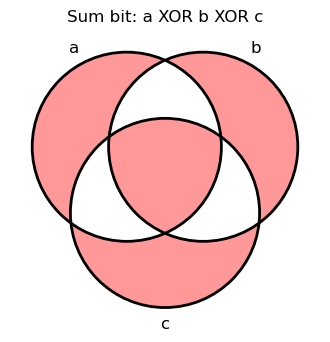

In [36]:
plt.figure(figsize=(4,4))

colors = {
    '000':'red'
}

v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('a', 'b', 'c'), set_colors=['white', 'white', 'white'])
#v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('red')
v.get_patch_by_id('010').set_color('red')
v.get_patch_by_id('001').set_color('red')
v.get_patch_by_id('111').set_color('red')
v.get_label_by_id('001').set_text('')
v.get_label_by_id('010').set_text('')
v.get_label_by_id('011').set_text('')
v.get_label_by_id('100').set_text('')
v.get_label_by_id('101').set_text('')
v.get_label_by_id('110').set_text('')
v.get_label_by_id('111').set_text('')

c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='solid')
plt.title("Sum bit: a XOR b XOR c")

plt.show()

## Constructing a Boolean Expression for the Carry Bit

Now that we've sorted out the sum bit, the next step is designing the logif for the carry bit. Once agan, I'll take the approach of constructing a logical statement for each `True`, or `1`, output from the truth table, `OR`ing the results together, and simplifying.

The logic table for a full adder, then -- one which takes inputs `a` and `b` *and* a carry bit `c` -- would look like this:

<table style="border-collapse: collapse;">
  <tr>
    <th style="padding: 10px; text-align: center; border-right: 0; border-bottom: 2px solid black;">a<sub>i</sub></th>
    <th style="padding: 10px; text-align: center; border-right: 0; border-bottom: 2px solid black;">b<sub>i</sub></th>
    <th style="padding: 10px; text-align: center; border-right: 2px solid black; border-bottom: 2px solid black;">C<sub>i</sub></th>
    <th style="padding: 10px; text-align: center; border-bottom: 2px solid black;">c<sub>i+1</sub></th>
    <th style="padding: 10px; text-align: center; border-bottom: 2px solid black;">Logic</th>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
    <td></td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
    <td></td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
    <td></td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: black;">NOT(A) AND B AND C</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: red;">0</td>
    <td></td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: red;">0</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: black;">A AND NOT(B) AND C</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: red;">0</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: black;">A AND B AND NOT(C)</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 0; color: green;">1</td>
    <td style="padding: 10px; text-align: center; border-right: 2px solid black; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: green;">1</td>
    <td style="padding: 10px; text-align: center; color: black;">A AND B AND C</td>
  </tr>
</table>

Thus our starting equation is:

$$
\begin{array}{llr}
  & (\lnot a \land b \land c) \lor (a \land \lnot b \land c) \lor (a \land b \land \lnot c) \lor (a \land b \land c) \\
= & (c \land ((\lnot a \land b) \lor (a \land \lnot b) \lor (a \land b)) \lor (a \land b \land \lnot c ) &\Leftarrow \text{by distributive law}\\
\end{array} 
$$

This is complicated-looking, but as with the sum bit logic, there's a major simplification that can happen once we recognize that the term $ (\lnot a \land b) \lor (a \land \lnot b) \lor (a \land b) = a \lor b $. This becomes clear just from thinking about the three terms making up the equation, but it can also be derived like so:

$$
\begin{array}{llr}
  & (\lnot a \land b) \lor (a \land \lnot b) \lor (a \land b) \\
= & (\lnot a \land b) \lor (a \land ( \lnot b \lor b)) &\Leftarrow \text{by distributive law}\\
= & (\lnot a \land b) \lor (a \land 1)  &\Leftarrow \text{by compliment law}\\
= & (\lnot a \land b) \lor a  &\Leftarrow \text{by identity law}\\
= & \lnot \lnot ((\lnot a \land b) \lor a)  &\Leftarrow \text{by double negation law}\\
= & \lnot ( \lnot (\lnot a \land b) \land (\lnot a))  &\Leftarrow \text{by de Morgan's theorem}\\
= & \lnot (( \lnot \lnot a \lor \lnot b) \land (\lnot a)) &\Leftarrow \text{by de Morgan's theorem}\\
= & \lnot (( a \lor \lnot b) \land (\lnot a)) &\Leftarrow \text{by double negation law}\\
= & \lnot (( a \land \lnot a) \lor (\lnot b \land \lnot a)) &\Leftarrow \text{by distributive law}\\
= & \lnot (0 \lor (\lnot b \land \lnot a)) &\Leftarrow \text{by compliment law}\\
= & \lnot (\lnot b \land \lnot a) &\Leftarrow \text{by identity law}\\
= & \lnot \lnot b \lor \lnot \lnot a &\Leftarrow \text{by de Morgan's theorem} \\
= & b \lor a &\Leftarrow \text{by double negation law}\\
\end{array} 
$$

Picking up from where we left off, then:
$$
\begin{array}{llr}
  & (c \land ((\lnot a \land b) \lor (a \land \lnot b) \lor (a \land b)) \lor (a \land b \land \lnot c )\\
= & (c \land (a \lor b)) \lor (a \land b \land \lnot c ) &\Leftarrow \text{by derivation above}\\
= & (c \land a ) \lor (c \land b) \lor (a \land b \land \lnot c ) &\Leftarrow \text{by distributive law}\\
= & a \land (c  \lor (b \land \lnot c) \lor (b \land c ) &\Leftarrow \text{by distributive law}\\
= & a \land (c  \lor b) \lor (b \land c ) &\Leftarrow \text{by redundancy law}\\
\end{array} 
$$

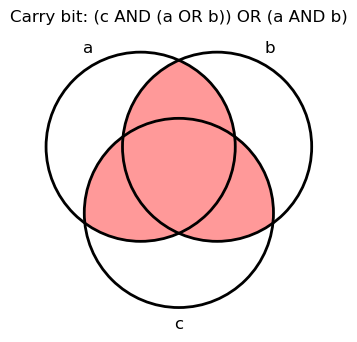

In [38]:
plt.figure(figsize=(4,4))

colors = {
    '000':'red'
}

v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('a', 'b', 'c'), set_colors=['white', 'white', 'white'])
#v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('110').set_color('red')
v.get_patch_by_id('011').set_color('red')
v.get_patch_by_id('101').set_color('red')
v.get_patch_by_id('111').set_color('red')
v.get_label_by_id('001').set_text('')
v.get_label_by_id('010').set_text('')
v.get_label_by_id('011').set_text('')
v.get_label_by_id('100').set_text('')
v.get_label_by_id('101').set_text('')
v.get_label_by_id('110').set_text('')
v.get_label_by_id('111').set_text('')

c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='solid')
plt.title("Carry bit: (c AND (a OR b)) OR (a AND b)")

plt.show()

## The Final Full Adder Circuit

Put it all together and it looks something like this:

Or, if you're slightly masochistic and would prefer exclusively `NAND` gates, like this: